**Change in compressive stress**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Packages form Henriks Github
from lammps_logfile import running_mean, get_color_value
from regex_file_collector import Collector
from regex_file_collector.utils import floating_number_pattern
import lammps_logfile

In [13]:
paths = ['/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_2000/fracture_displacement.npy',
         '/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_3000/fracture_displacement.npy',
         '/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_4000/fracture_displacement.npy',
         '/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.030000/fracture_displacement.npy',
         '/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_6000/fracture_displacement.npy',
         '/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_7000/fracture_displacement.npy']

stress_x = [200, 300, 400, 500, 600, 700]

/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_2000/fracture_displacement.npy
42
/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_3000/fracture_displacement.npy
42
/home/users/marthgg/2021_08_quartz_simulations/crack_simulation_deformZ_1.030000/fracture_displacement.npy
43
/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_6000/fracture_displacement.npy
38
/home/users/marthgg/2021_10_change_pressureX/crack_simulation_pressX_7000/fracture_displacement.npy
36


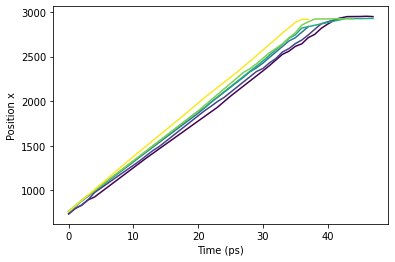

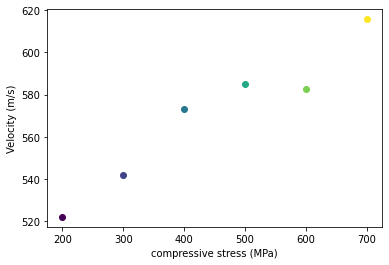

In [15]:
system_length = 3000
crack_start_point = 150

k = 0

for path in paths:
        
    filename = path

    data = np.load(filename, allow_pickle=False)
    frames = list(range(0, len(data)))

    filtered_data_crackTip = []
    filtered_data_frames   = []

    for i in range(0, len(data)):
        if data[i] > crack_start_point and data[i] < system_length:
            filtered_data_crackTip.append(data[i])
            filtered_data_frames.append(frames[i])            
    
    for i in range(0, len(filtered_data_frames)):
        if filtered_data_crackTip[i] > 2910:
            print(filename)
            print(filtered_data_frames[i])
            break

    # Find velocity
    timestep = 0.001 # ps
    dump_frequency = 10000

    time_s = []
    time = []
    for i in range(0, len(filtered_data_frames)):
        time.append(filtered_data_frames[i]*timestep*dump_frequency) #Time in ps
        if filtered_data_crackTip[i] < 2910:
            time_s.append(filtered_data_frames[i]*timestep*dump_frequency*(10**-12)) #time in s

    position_m = []
    for i in range(0, len(filtered_data_crackTip)):
        if filtered_data_crackTip[i] < 2910:
            position_m.append(filtered_data_crackTip[i]*(10**-10)) #distance in m

    velocity = np.diff(position_m)/np.diff(time_s)
    mean_velocity = np.mean(velocity)
   
    plt.figure(1)
    plt.plot(filtered_data_frames, filtered_data_crackTip, color=get_color_value(float(stress_x[k]), 200, 700))
    plt.xlabel('Time (ps)')
    plt.ylabel('Position x')
    
    plt.figure(2)
    plt.plot(stress_x[k], mean_velocity, 'o', color=get_color_value(float(stress_x[k]), 200, 700))
    plt.xlabel('compressive stress (MPa)')
    plt.ylabel('Velocity (m/s)')

    k += 1